<a href="https://colab.research.google.com/github/Akshay-879/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

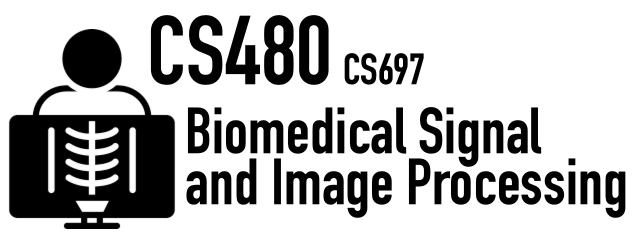
# Assignment 1


In [91]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [92]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [93]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

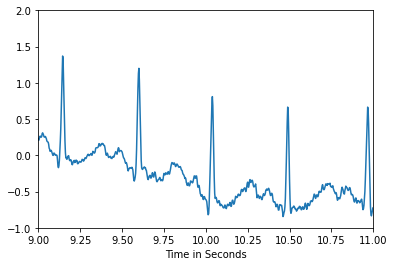

In [97]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds.
time = np.arange(ecg.size) / SAMPLING_RATE
plt.plot(time, ecg)
plt.xlabel("Time in Seconds")
plt.xlim(9, 11)
plt.ylim(-1, 2)
plt.show()

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [98]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [99]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [100]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [101]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


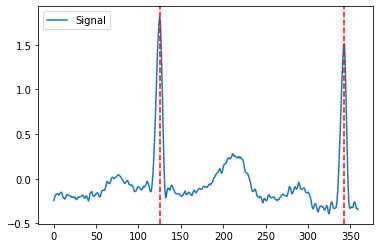

In [102]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [103]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [104]:
_, rpeaks9to11 = nk.ecg_peaks(ecg[SAMPLING_RATE*8: SAMPLING_RATE*11], sampling_rate=SAMPLING_RATE)

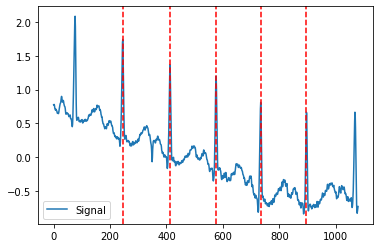

In [105]:
plot1=nk.events_plot(rpeaks9to11['ECG_R_Peaks'], ecg[SAMPLING_RATE*8: SAMPLING_RATE*11])

**Task 3:** Detect Heartrate. [15 Points]

In [106]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [107]:
# No the Patient does not have a normal heart rate. It can be observed that there are two rpeaks in one second. 
# It means that patients heart is beating at a rate of 2 beats per second and 120 beats per minute.
# Whereas a normal persons heart beats at a rate of 60-100 beats per minute.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [108]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [109]:
_, waves_peak = nk.ecg_delineate(ecg[SAMPLING_RATE*8: SAMPLING_RATE*11], rpeaks9to11, sampling_rate=SAMPLING_RATE, method="peak")

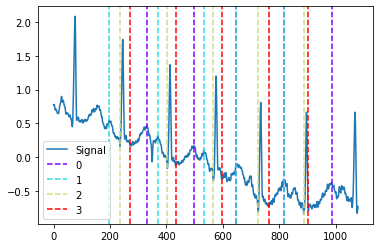

In [110]:
plot2 = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[SAMPLING_RATE*8: SAMPLING_RATE*11])

In [111]:
# TODO Does the detection work well?

In [112]:
# No, the detection of the P, Q, S, T peaks do not work well. The peaks are shifted to the right side.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [113]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [114]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [115]:
filtered_ecg_signal= nk.signal_filter(ecg, sampling_rate=SAMPLING_RATE,  lowcut=11, highcut=20)

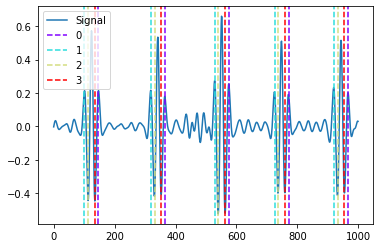

In [116]:
_, waves_peak_full_signal = nk.ecg_delineate(filtered_ecg_signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
plot3 = nk.events_plot([waves_peak_full_signal['ECG_T_Peaks'][0:5],
                       waves_peak_full_signal['ECG_P_Peaks'][0:5],
                       waves_peak_full_signal['ECG_Q_Peaks'][0:5],
                       waves_peak_full_signal['ECG_S_Peaks'][0:5]], filtered_ecg_signal[0:1000])

In [117]:
# TODO Does the filtering improve the result?
# After filtering we get slightly better results.

In [ ]:
# Collboration: Ishan Dubey.
# Refrences: 
# 1.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
# 2.  https://neurokit2.readthedocs.io/en/latest/


In [118]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#